In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import manifold
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

from time import time

In [2]:
df = pd.read_csv('batchcorrected_log2cpm.tsv', sep='\t',index_col=0)
#df.set_index(df["Unnamed: 0"], inplace=True)
df.head()

,100_2,101_3,102_2,103_3,104_2,105_2,106_4,107_4,109_1,11_4,...,90_2,91_2,92_3,93_2,94_4,95_4,96_3,97_2,98_3,99_1
ENSG00000000003,4.224093,4.088110,4.108960,4.338494,4.144095,3.961678,4.068081,4.181222,4.177308,4.345819,...,4.095915,4.185599,3.984862,4.437899,4.258712,3.980472,4.310913,4.078538,4.171295,4.225876
ENSG00000000419,4.273573,4.278318,4.508365,4.533990,4.451600,4.437512,4.229555,4.359195,4.299986,4.569697,...,4.615619,4.413496,4.623100,4.781393,4.534774,4.570218,4.722600,4.492435,4.560072,4.415542
ENSG00000000457,4.716466,4.969749,4.852762,4.947713,4.882771,4.704028,4.675137,4.517319,4.740297,4.672500,...,4.700506,4.839435,4.763086,4.870351,4.876640,4.812464,4.812821,4.840323,4.880159,4.652706
ENSG00000000460,4.126170,4.528228,4.286024,4.310150,4.150902,4.265058,4.737984,4.102466,4.593532,4.613472,...,4.476497,4.568329,4.556887,4.323269,4.165587,4.667403,4.378113,4.334682,4.361387,3.685774
ENSG00000000938,1.171196,0.862429,1.540143,1.105556,1.375205,1.568452,1.638125,1.233508,1.497463,1.548793,...,1.454494,0.874062,1.199031,2.341509,1.732493,1.523060,1.136348,1.578141,0.897523,1.096682


In [3]:
#transpose the dataframe --> make genes as dementions 
dfn = df.T
dfn['mgs_level'] = 0
dfn.reset_index(inplace = True)
list = dfn['index'].apply(lambda x:x[-1]).tolist()
#list 
dfn['mgs_level'] = list
level = dfn.pop('mgs_level')
dfn.insert(1,'mgs_level',level)
dfn.head()

,index,mgs_level,ENSG00000000003,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,...,ENSG00000283529,ENSG00000283536,ENSG00000283590,ENSG00000283617,ENSG00000283619,ENSG00000283623,ENSG00000283633,ENSG00000283662,ENSG00000283667,ENSG00000283674
0,100_2,2,4.224093,4.273573,4.716466,4.126170,1.171196,4.015480,3.293096,5.294673,...,1.145577,3.068081,1.881444,1.346983,1.513299,0.797770,0.419013,0.843287,1.047956,1.928373
1,101_3,3,4.088110,4.278318,4.969749,4.528228,0.862429,3.843299,3.390655,5.527211,...,1.189183,2.866956,1.795239,2.366877,1.177736,1.070189,1.483662,0.637100,1.125788,1.522671
2,102_2,2,4.108960,4.508365,4.852762,4.286024,1.540143,3.846015,3.596859,4.948842,...,0.915614,2.886454,1.835291,2.017325,1.232213,0.841682,0.010696,0.723624,1.194329,1.378135
3,103_3,3,4.338494,4.533990,4.947713,4.310150,1.105556,3.877232,3.448069,5.472893,...,0.850755,2.891162,1.961135,1.967287,1.947879,0.387205,0.712213,0.256273,1.322104,2.025008
4,104_2,2,4.144095,4.451600,4.882771,4.150902,1.375205,4.456291,3.501590,5.159368,...,0.647376,3.128063,2.011594,1.556070,0.814551,1.100907,1.155770,0.919095,1.381362,1.788005


In [4]:
## separate control vs patient
control = dfn[dfn.mgs_level == '1']
patient = dfn[dfn.mgs_level != '1']

In [5]:
control.head()

,index,mgs_level,ENSG00000000003,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,...,ENSG00000283529,ENSG00000283536,ENSG00000283590,ENSG00000283617,ENSG00000283619,ENSG00000283623,ENSG00000283633,ENSG00000283662,ENSG00000283667,ENSG00000283674
8,109_1,1,4.177308,4.299986,4.740297,4.593532,1.497463,4.057762,3.343734,5.021024,...,1.072496,2.887815,1.755579,1.772080,0.592089,0.999594,0.705493,0.748250,1.282221,2.053524
15,115_1,1,4.241472,4.441022,4.804861,3.989499,1.072882,3.614325,3.297278,5.242712,...,1.021071,2.686574,1.109814,2.035455,1.718607,1.033493,0.799001,0.487644,1.526137,1.553504
17,117_1,1,3.863648,4.437281,4.882508,4.504008,1.671384,4.387065,3.378628,5.138772,...,0.226050,2.669231,1.659946,1.271946,0.823566,1.191215,0.812745,0.815359,1.579369,2.274689
18,119_1,1,4.063576,4.290273,4.466665,4.761237,1.580267,3.809128,3.524963,5.093789,...,0.286553,2.741063,1.801195,1.801970,2.053347,0.314001,0.743814,0.815210,0.982556,1.984814
19,120_1,1,4.049423,4.443427,4.753416,4.395347,1.644460,4.031802,3.125032,5.148547,...,0.714884,3.036836,2.161906,1.865505,1.353617,1.873662,0.524925,0.626578,0.596844,1.321599


In [6]:
patient.head()

,index,mgs_level,ENSG00000000003,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,...,ENSG00000283529,ENSG00000283536,ENSG00000283590,ENSG00000283617,ENSG00000283619,ENSG00000283623,ENSG00000283633,ENSG00000283662,ENSG00000283667,ENSG00000283674
0,100_2,2,4.224093,4.273573,4.716466,4.126170,1.171196,4.015480,3.293096,5.294673,...,1.145577,3.068081,1.881444,1.346983,1.513299,0.797770,0.419013,0.843287,1.047956,1.928373
1,101_3,3,4.088110,4.278318,4.969749,4.528228,0.862429,3.843299,3.390655,5.527211,...,1.189183,2.866956,1.795239,2.366877,1.177736,1.070189,1.483662,0.637100,1.125788,1.522671
2,102_2,2,4.108960,4.508365,4.852762,4.286024,1.540143,3.846015,3.596859,4.948842,...,0.915614,2.886454,1.835291,2.017325,1.232213,0.841682,0.010696,0.723624,1.194329,1.378135
3,103_3,3,4.338494,4.533990,4.947713,4.310150,1.105556,3.877232,3.448069,5.472893,...,0.850755,2.891162,1.961135,1.967287,1.947879,0.387205,0.712213,0.256273,1.322104,2.025008
4,104_2,2,4.144095,4.451600,4.882771,4.150902,1.375205,4.456291,3.501590,5.159368,...,0.647376,3.128063,2.011594,1.556070,0.814551,1.100907,1.155770,0.919095,1.381362,1.788005


In [7]:
## 0 if stage is 1, 1 if stage is 1,2,3
control["binary"] = 0
patient["binary"] = 1

/Users/minjunp/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/minjunp/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
## merge two datasets vertically and remove mgs level
new_df = control.append(patient, ignore_index=True)
new_df = new_df.iloc[:,2:]
new_df.head()

,ENSG00000000003,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,ENSG00000001460,...,ENSG00000283536,ENSG00000283590,ENSG00000283617,ENSG00000283619,ENSG00000283623,ENSG00000283633,ENSG00000283662,ENSG00000283667,ENSG00000283674,binary
0,4.177308,4.299986,4.740297,4.593532,1.497463,4.057762,3.343734,5.021024,5.864690,5.190097,...,2.887815,1.755579,1.772080,0.592089,0.999594,0.705493,0.748250,1.282221,2.053524,0
1,4.241472,4.441022,4.804861,3.989499,1.072882,3.614325,3.297278,5.242712,5.836880,5.064816,...,2.686574,1.109814,2.035455,1.718607,1.033493,0.799001,0.487644,1.526137,1.553504,0
2,3.863648,4.437281,4.882508,4.504008,1.671384,4.387065,3.378628,5.138772,5.641097,5.117710,...,2.669231,1.659946,1.271946,0.823566,1.191215,0.812745,0.815359,1.579369,2.274689,0
3,4.063576,4.290273,4.466665,4.761237,1.580267,3.809128,3.524963,5.093789,5.955642,5.215154,...,2.741063,1.801195,1.801970,2.053347,0.314001,0.743814,0.815210,0.982556,1.984814,0
4,4.049423,4.443427,4.753416,4.395347,1.644460,4.031802,3.125032,5.148547,5.687160,5.067885,...,3.036836,2.161906,1.865505,1.353617,1.873662,0.524925,0.626578,0.596844,1.321599,0


In [9]:
## print shape
new_df.shape

(453, 18054)

In [10]:
## split into X, Y variables
X_train = new_df.iloc[:,:-1]
y_train = new_df.iloc[:,-1]
X_train.shape, y_train.shape

((453, 18053), (453,))

In [11]:
import seaborn as sns
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn import datasets, linear_model

scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [12]:
sel_ = SelectFromModel(LogisticRegression(penalty='l1')) ##penalty is lasso regression
sel_.fit(scaler.transform(X_train), y_train)

/Users/minjunp/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


SelectFromModel(estimator=LogisticRegression(C=1.0, class_weight=None,
                                             dual=False, fit_intercept=True,
                                             intercept_scaling=1, l1_ratio=None,
                                             max_iter=100, multi_class='warn',
                                             n_jobs=None, penalty='l1',
                                             random_state=None, solver='warn',
                                             tol=0.0001, verbose=0,
                                             warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [13]:
lasso = linear_model.Lasso()
cv_results = cross_validate(lasso, X_train, y_train)
cv_results.keys()
cv_results
#cross_validate(sel2_, scaler.transform(X_train), y_train)

/Users/minjunp/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/minjunp/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)


{'fit_time': array([3.66810513, 0.05877399, 0.05878806]),
 'score_time': array([0.00543189, 0.004287  , 0.00381708]),
 'test_score': array([-2.2826087,  0.       ,  0.       ])}

In [14]:
sel_.get_support()

array([False, False, False, ...,  True, False, False])

In [15]:
## Make a list of with the selected features.
selected_feat = X_train.columns[(sel_.get_support())]
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
      np.sum(sel_.estimator_.coef_ == 0)))

total features: 18053
selected features: 305
features with coefficients shrank to zero: 17748


In [16]:
## Number of features which coefficient was shrank to zero :
np.sum(sel_.estimator_.coef_ == 0)

17748

In [17]:
## Identifying the removed features
removed_feats = X_train.columns[(sel_.estimator_.coef_ == 0).ravel().tolist()]
removed_feats

Index(['ENSG00000000003', 'ENSG00000000419', 'ENSG00000000457',
       'ENSG00000000460', 'ENSG00000000938', 'ENSG00000000971',
       'ENSG00000001036', 'ENSG00000001084', 'ENSG00000001167',
       'ENSG00000001460',
       ...
       'ENSG00000283515', 'ENSG00000283529', 'ENSG00000283536',
       'ENSG00000283590', 'ENSG00000283617', 'ENSG00000283619',
       'ENSG00000283623', 'ENSG00000283633', 'ENSG00000283667',
       'ENSG00000283674'],
      dtype='object', length=17748)

In [33]:
sig_feats = X_train.columns[(sel_.estimator_.coef_ != 0).ravel().tolist()]
sig_feats
sig_feats.shape

(305,)

In [19]:
## Removing the features from training
## 453 patients, 309 important features
X_train_selected = sel_.transform(X_train)
X_train_selected = np.transpose(X_train_selected)
X_train_selected.shape
#sample = X_train_selected[1:100]
#ylabel = sig_feats[1:100]
#type(ylabel)
#ylabel = ylabel.values.tolist()

(305, 453)

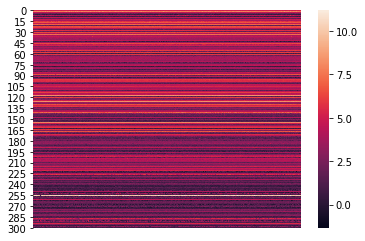

In [20]:
sns.heatmap(X_train_selected, xticklabels=False)

In [21]:
sig_feats

Index(['ENSG00000003989', 'ENSG00000004766', 'ENSG00000008988',
       'ENSG00000011114', 'ENSG00000025770', 'ENSG00000029993',
       'ENSG00000037965', 'ENSG00000048544', 'ENSG00000049130',
       'ENSG00000049283',
       ...
       'ENSG00000278970', 'ENSG00000279722', 'ENSG00000279894',
       'ENSG00000280383', 'ENSG00000280670', 'ENSG00000281189',
       'ENSG00000282021', 'ENSG00000282960', 'ENSG00000283149',
       'ENSG00000283662'],
      dtype='object', length=305)

In [32]:
X_train_selected

array([[ 6.69559393,  6.70586336,  6.75958195, ...,  6.67825824,
         6.57679985,  6.81547331],
       [ 5.14629373,  5.36492364,  5.1877982 , ...,  5.19561945,
         5.28573393,  5.26650129],
       [ 7.77858545,  7.98189699,  8.06644628, ...,  7.88595183,
         7.4907779 ,  7.78014071],
       ...,
       [ 0.28618652, -0.02512118, -0.21876274, ...,  0.76335708,
        -0.30285515,  0.32250177],
       [ 2.07027829,  1.74000657,  1.80896644, ...,  1.88490621,
         2.49207146,  2.24200515],
       [ 0.74824957,  0.48764392,  0.81535881, ...,  1.08221124,
         0.36155642,  0.71205109]])

In [31]:
"""
df = titanic.pivot_table(index='embark_town', columns='age_group', values='fare', aggfunc=np.median)
sns.heatmap(df, annot=True, fmt=".1f")
plt.show()
"""
X_train_selected
df = pd.DataFrame(data=X_train_selected, index=sig_feats)
df2 = df.iloc[0:100,:]
df2.T

,ENSG00000003989,ENSG00000004766,ENSG00000008988,ENSG00000011114,ENSG00000025770,ENSG00000029993,ENSG00000037965,ENSG00000048544,ENSG00000049130,ENSG00000049283,...,ENSG00000133321,ENSG00000133392,ENSG00000133983,ENSG00000134545,ENSG00000134851,ENSG00000134901,ENSG00000135070,ENSG00000135338,ENSG00000135423,ENSG00000135778
0,6.695594,5.146294,7.778585,5.154556,4.312443,2.116583,0.316575,4.864240,4.105004,0.312377,...,2.877569,2.057186,4.441500,1.020860,5.295547,2.828186,6.011084,5.606648,5.647777,5.724004
1,6.705863,5.364924,7.981897,5.319880,4.516899,2.613674,1.066329,4.596166,4.446653,0.892885,...,3.168265,1.904501,4.410056,0.796268,5.048638,2.474486,5.948625,5.481424,5.130088,5.789315
2,6.759582,5.187798,8.066446,5.106157,4.503161,2.221473,1.103754,4.778602,3.812526,0.675256,...,3.574906,2.117923,4.356064,0.822872,5.214186,2.702192,5.868979,5.586667,5.000047,5.471559
3,7.111123,5.393166,7.992052,5.545611,4.661380,2.529024,0.372680,4.996083,3.452003,0.803822,...,3.145523,2.010644,4.643746,1.041547,5.224604,2.660089,6.030248,5.427745,5.226821,5.542832
4,6.688237,5.405849,8.114196,5.411421,4.607485,2.630316,0.432398,5.011882,4.466966,0.931823,...,3.174568,1.970121,4.043201,0.836318,5.402611,2.521951,5.955080,5.602710,5.321989,5.803213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,6.820931,5.170314,7.715202,5.177065,4.396200,2.158175,0.536532,5.099292,3.120465,0.705716,...,3.312046,2.349958,4.356855,1.044458,5.223115,2.616302,5.895563,5.632430,5.090639,5.553102
449,6.871956,5.116103,7.770525,5.163205,4.467830,2.174223,0.283266,4.833929,3.701978,0.960398,...,2.939786,1.455692,4.277659,0.475238,5.226915,2.774211,5.963285,5.666526,5.292344,5.472378
450,6.678258,5.195619,7.885952,5.430649,4.597948,2.534048,0.324601,4.676910,4.285852,0.554655,...,3.003202,2.687685,4.509081,0.740497,5.157421,2.500025,5.953063,5.436008,5.145007,5.666482
451,6.576800,5.285734,7.490778,5.145526,4.515899,2.419444,0.248378,5.030916,4.046474,0.473963,...,2.965336,3.376755,4.586207,0.957373,5.191874,2.434183,6.010698,5.539395,5.302545,5.688616


array([[ 6.69559393,  6.70586336,  6.75958195, ...,  6.67825824,
         6.57679985,  6.81547331],
       [ 5.14629373,  5.36492364,  5.1877982 , ...,  5.19561945,
         5.28573393,  5.26650129],
       [ 7.77858545,  7.98189699,  8.06644628, ...,  7.88595183,
         7.4907779 ,  7.78014071],
       ...,
       [ 0.28618652, -0.02512118, -0.21876274, ...,  0.76335708,
        -0.30285515,  0.32250177],
       [ 2.07027829,  1.74000657,  1.80896644, ...,  1.88490621,
         2.49207146,  2.24200515],
       [ 0.74824957,  0.48764392,  0.81535881, ...,  1.08221124,
         0.36155642,  0.71205109]])

In [23]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,443,444,445,446,447,448,449,450,451,452
ENSG00000003989,6.695594,6.705863,6.759582,7.111123,6.688237,6.256035,6.943475,7.090734,6.970547,6.360821,...,6.593068,6.804329,6.783343,6.775495,6.501708,6.820931,6.871956,6.678258,6.576800,6.815473
ENSG00000004766,5.146294,5.364924,5.187798,5.393166,5.405849,5.193537,5.172141,5.333750,5.345328,5.140062,...,5.268471,5.081529,5.469077,5.224128,5.231299,5.170314,5.116103,5.195619,5.285734,5.266501
ENSG00000008988,7.778585,7.981897,8.066446,7.992052,8.114196,7.671565,7.906723,8.116759,8.065312,8.032260,...,7.801855,7.887236,8.186821,7.728106,7.629147,7.715202,7.770525,7.885952,7.490778,7.780141
ENSG00000011114,5.154556,5.319880,5.106157,5.545611,5.411421,5.154238,5.361140,5.132047,5.275758,5.236897,...,5.309631,5.340666,5.242236,5.122214,5.336226,5.177065,5.163205,5.430649,5.145526,5.301950
ENSG00000025770,4.312443,4.516899,4.503161,4.661380,4.607485,4.642304,4.618493,4.472616,4.477198,4.525753,...,4.374975,4.378984,4.836389,4.580302,4.632392,4.396200,4.467830,4.597948,4.515899,4.502657


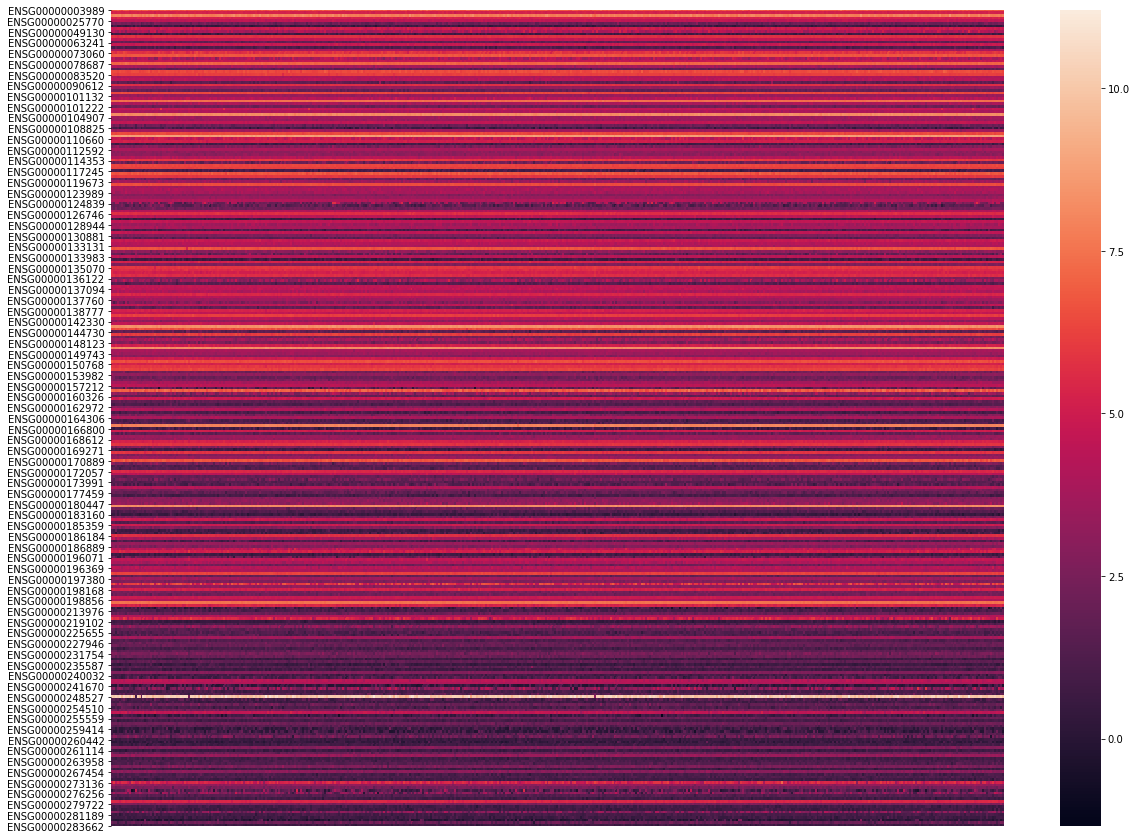

In [24]:
plt.subplots(figsize=(20,15))
sns.heatmap(df, xticklabels=False)
plt.show()

In [25]:
df_de = pd.read_excel('limma_DEresults.xlsx', sheet_name='41')
#df.set_index(df["Unnamed: 0"], inplace=True)
df_de.head()

,ensembl_gene_id,external_gene_name,strand,chromosome_name,start_position,end_position,gene_biotype,logFC,FC,AveExpr,t,P.Value,adj.P.Val,B
0,ENSG00000110777,POU2AF1,-1,11,111352252,111455630,protein_coding,0.825519,1.772173,-1.696753,4.334122,0.000018,0.106212,0.016867
1,ENSG00000079931,MOXD1,-1,6,132296055,132401545,protein_coding,0.423723,1.341385,3.646661,4.290713,0.000022,0.106212,2.480846
2,ENSG00000141682,PMAIP1,1,18,59899948,59904306,protein_coding,-0.951902,0.516950,0.649210,-4.261544,0.000025,0.106212,1.182466
3,ENSG00000162496,DHRS3,-1,1,12567910,12617731,protein_coding,-0.259173,0.835567,3.704378,-4.232522,0.000028,0.106212,2.257107
4,ENSG00000143669,LYST,-1,1,235661041,235883640,protein_coding,0.083720,1.059747,8.355620,4.206160,0.000032,0.106212,1.876695


In [26]:
p_df = df_de.loc[df_de['adj.P.Val'] < 0.11] ## select genes with adjusted p value less than 0.11
p_df

,ensembl_gene_id,external_gene_name,strand,chromosome_name,start_position,end_position,gene_biotype,logFC,FC,AveExpr,t,P.Value,adj.P.Val,B
0,ENSG00000110777,POU2AF1,-1,11,111352252,111455630,protein_coding,0.825519,1.772173,-1.696753,4.334122,0.000018,0.106212,0.016867
1,ENSG00000079931,MOXD1,-1,6,132296055,132401545,protein_coding,0.423723,1.341385,3.646661,4.290713,0.000022,0.106212,2.480846
2,ENSG00000141682,PMAIP1,1,18,59899948,59904306,protein_coding,-0.951902,0.516950,0.649210,-4.261544,0.000025,0.106212,1.182466
3,ENSG00000162496,DHRS3,-1,1,12567910,12617731,protein_coding,-0.259173,0.835567,3.704378,-4.232522,0.000028,0.106212,2.257107
4,ENSG00000143669,LYST,-1,1,235661041,235883640,protein_coding,0.083720,1.059747,8.355620,4.206160,0.000032,0.106212,1.876695
5,ENSG00000163453,IGFBP7,-1,4,57030773,57110385,protein_coding,0.233763,1.175898,4.103989,4.180345,0.000035,0.106212,2.040094
